<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ZipDigits.info')
df.head()

,Normalized handwritten digits,automatically
0,scanned from envelopes by the U.S. Postal Serv...,NaN
1,scanned digits are binary and of different siz...,NaN
2,images here have been deslanted and size norm...,resulting
3,in 16 x 16 grayscale images (Le Cun et al.,1990).
4,The data are in two gzipped files,and each line consists of the digit


In [9]:
# Load the training and testing datasets
train_data = pd.read_csv('ZipDigits.train', header=None, sep=' ')
test_data = pd.read_csv('ZipDigits.test', header=None, sep=' ')

In [11]:
# Filter the training and testing datasets
n1 = 1
n2 = 5
train_data_filtered = train_data[(train_data[0] == n1) | (train_data[0] == n2)]
test_data_filtered = test_data[(test_data[0] == n1) | (test_data[0] == n2)]

# Drop the column containing NaN values
train_data_filtered = train_data_filtered.dropna(axis=1)
test_data_filtered = test_data_filtered.dropna(axis=1)

In [12]:
# Convert labels to binary classification
train_data_filtered[0] = train_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)
test_data_filtered[0] = test_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)

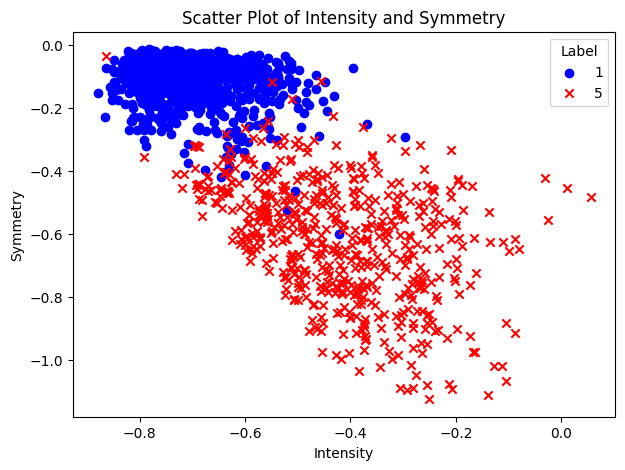

In [13]:
intensity_list_train = []
symmetry_list_train = []
labels_train = []

for index, row in train_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list_train.append(intensity)
    symmetry_list_train.append(symmetry)
    labels_train.append(label)

plt.figure(figsize=(7, 5))

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            label='5', color='red', marker='x')

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Scatter Plot of Intensity and Symmetry')
plt.legend(title='Label')
plt.show()

In [14]:
# Function to extract features
def extract_features(intensity_list, symmetry_list, data):
    x = np.column_stack((np.ones(len(intensity_list)), intensity_list, symmetry_list))
    y = data[0].values
    return x, y

In [15]:
x_train, y_train = extract_features(intensity_list_train, symmetry_list_train, train_data_filtered)

In [115]:
def pla(X, Y, max_iter=1000):
    w = np.zeros(X.shape[1])

    for _ in range(max_iter):
        misclassified = False

        for i in range(X.shape[0]):
            if Y[i] * np.dot(w, X[i, :]) <= 0:
                w = w + Y[i] * X[i, :]
                misclassified = True

        if not misclassified:
            break
    return w

# Run PLA
w_PLA = pla(x_train, y_train)
w_PLA

array([ 0.        , -3.93326562,  8.25096875])

In [90]:
def pocket_algorithm(X, Y, max_iter=1000):
    w = np.zeros(X.shape[1])
    w_pocket = np.copy(w)
    min_error = float('inf')

    for _ in range(max_iter):
        for i in range(X.shape[0]):
            if Y[i] * np.dot(w, X[i, :]) <= 0:
                w = w + Y[i] * X[i, :]
                current_error = np.sum(Y * np.dot(X, w) <= 0)
                if current_error < min_error:
                    w_pocket = np.copy(w)
                    min_error = current_error
    return w_pocket


# Run Pocket Algorithm
w_pocket = pocket_algorithm(x_train, y_train, max_iter=100000)
w_pocket

array([ 0.        , -4.50577344,  8.04978125])

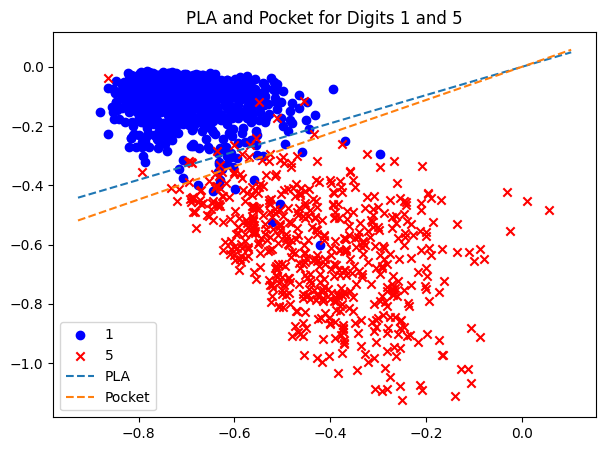

In [116]:
plt.figure(figsize=(7, 5))
plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            [symmetry_list_train[i] for i in range(len(labels_train)) if labels_train[i] == -1],
            label='5', color='red', marker='x')

axes = plt.gca()
x_val = np.array(axes.get_xlim())
y_val_pla = -w_PLA[0]/w_PLA[2] - w_PLA[1]/w_PLA[2] * x_val
y_val_pocket = -w_pocket[0]/w_pocket[2] - w_pocket[1]/w_pocket[2] * x_val
plt.plot(x_val, y_val_pla, '--', label='PLA')
plt.plot(x_val, y_val_pocket, '--', label='Pocket')
plt.legend()
plt.title('PLA and Pocket for Digits 1 and 5')
plt.show()

In [117]:
intensity_list_test = []
symmetry_list_test = []
labels_test = []

for index, row in test_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list_test.append(intensity)
    symmetry_list_test.append(symmetry)
    labels_test.append(label)

In [118]:
x_test, y_test = extract_features(intensity_list_test, symmetry_list_test, test_data_filtered)

In [119]:
def compute_error_rate(w, x, y):
    predictions = np.sign(np.dot(x, w))
    error_rate = np.mean(predictions != y)
    return error_rate

In [120]:
error_rate_pla = compute_error_rate(w_PLA, x_test, y_test)
error_rate_pocket = compute_error_rate(w_pocket, x_test, y_test)

print(f"Error rate for PLA: {error_rate_pla:.2f}")
print(f"Error rate for Pocket Algorithm: {error_rate_pocket:.2f}")


Error rate for PLA: 0.05
Error rate for Pocket Algorithm: 0.04


In [106]:
# # Third-order polynomial feature transformation
# def transform_features(x):
#     X1 = x[:, 1]
#     X2 = x[:, 2]
#     transformed = np.column_stack([
#         x[:, 0],  # Bias term
#         X1,
#         X2,
#         X1**2,
#         X2**2,
#         X1*X2,
#         X1**3,
#         X2**3,
#         X1**2*X2,
#         X1*X2**2
#     ])
#     return transformed

In [ ]:
# # Transform features
# x_train_transformed = transform_features(x_train)
# x_test_transformed = transform_features(x_test)
# x_test_transformed[:5]

In [123]:
from sklearn.preprocessing import PolynomialFeatures

# Stack the features
x_test_original = np.column_stack((intensity_list_test, symmetry_list_test))

poly = PolynomialFeatures(3)

x_test_poly = poly.fit_transform(x_test_original)

x_test_poly.shape, x_test_poly[:5]

((424, 10),
 array([[ 1.00000000e+00, -6.80132812e-01, -3.32390625e-01,
          4.62580643e-01,  2.26069771e-01,  1.10483528e-01,
         -3.14616273e-01, -1.53757469e-01, -7.51434724e-02,
         -3.67236888e-02],
        [ 1.00000000e+00, -3.50320313e-01, -5.26484375e-01,
          1.22724321e-01,  1.84438171e-01,  2.77185797e-01,
         -4.29928226e-02, -6.46124376e-02, -9.71038151e-02,
         -1.45933991e-01],
        [ 1.00000000e+00, -4.97640625e-01, -7.16984375e-01,
          2.47646192e-01,  3.56800552e-01,  5.14066594e-01,
         -1.23238806e-01, -1.77558450e-01, -2.55820421e-01,
         -3.68577716e-01],
        [ 1.00000000e+00, -7.50781250e-01, -8.65468750e-02,
          5.63672485e-01,  6.49777710e-02,  7.49036157e-03,
         -4.23194733e-01, -4.87840921e-02, -5.62362302e-03,
         -6.48267387e-04],
        [ 1.00000000e+00, -5.61765625e-01, -8.49218750e-02,
          3.15580617e-01,  4.77061902e-02,  7.21172485e-03,
         -1.77282343e-01, -2.67996977e-0

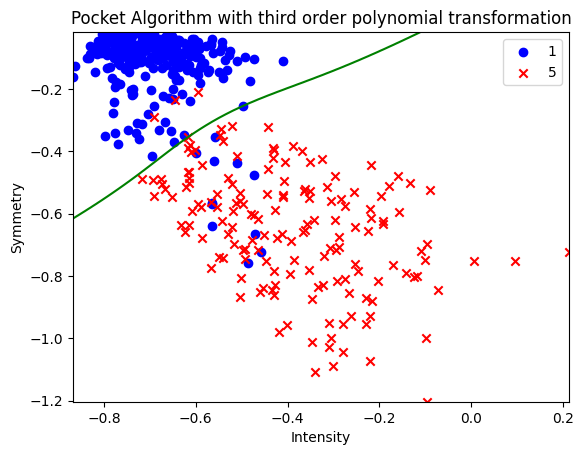

In [124]:
# Run the Pocket Algorithm with fewer iterations
w_pocket_transformed = pocket_algorithm(x_test_poly, y_test, max_iter=100000)

# Scatter plot
plt.scatter([intensity_list_test[i] for i in range(len(labels_test)) if labels_test[i] == 1],
            [symmetry_list_test[i] for i in range(len(labels_test)) if labels_test[i] == 1],
            label='1', color='blue', marker='o')

plt.scatter([intensity_list_test[i] for i in range(len(labels_test)) if labels_test[i] == -1],
            [symmetry_list_test[i] for i in range(len(labels_test)) if labels_test[i] == -1],
            label='5', color='red', marker='x')

# Plot decision boundary
x_min, x_max = np.min(intensity_list_test), np.max(intensity_list_test)
y_min, y_max = np.min(symmetry_list_test), np.max(symmetry_list_test)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = poly.transform(np.c_[xx.ravel(), yy.ravel()]).dot(w_pocket_transformed)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='green')

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.title('Pocket Algorithm with third order polynomial transformation')
plt.show()


In [125]:
# Compute test error
error_rate_pocket_transformed = compute_error_rate(w_pocket_transformed, x_test_poly, y_test)

print(f"Error rate for Pocket_transformed: {error_rate_pocket_transformed:.2f}")

Error rate for Pocket_transformed: 0.03
